**BOX OFFICE REVENUE PREDICTION**

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Moviesdataset1.csv to Moviesdataset1.csv


In [ ]:
data = pd.read_csv('Moviesdataset1.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Serial Number            200 non-null    int64  
 1   Title                    200 non-null    object 
 2   Year                     200 non-null    int64  
 3   Age Certification        200 non-null    object 
 4   IMDb rating              200 non-null    float64
 5   Revenue (in Crores INR)  200 non-null    float64
 6   Netflix                  200 non-null    object 
 7   Zee5                     200 non-null    object 
 8   Jio Cinema               200 non-null    object 
 9   Prime Video              200 non-null    object 
 10  Disney+ Hotstar          200 non-null    object 
 11  Director Name            200 non-null    object 
 12  Genres                   200 non-null    object 
 13  Language                 200 non-null    object 
 14  Runtime (minutes)        2

In [ ]:
data.head()

,Serial Number,Title,Year,Age Certification,IMDb rating,Revenue (in Crores INR),Netflix,Zee5,Jio Cinema,Prime Video,Disney+ Hotstar,Director Name,Genres,Language,Runtime (minutes)
0,1,Pathaan,2023,UA,5.9,1050.30,Yes,No,No,Yes,No,Siddharth Anand,Action/Thriller,Hindi,146
1,2,Jawan,2023,UA,7.0,1148.32,Yes,No,No,No,No,Atlee,Action/Thriller,Hindi,169
2,3,Animal,2023,A,6.4,896.63,No,No,No,Yes,No,Sandeep Reddy Vanga,Action/Crime/Drama,Hindi,201
3,4,Rocky Aur Rani Kii Prem Kahaani,2023,UA,6.9,355.61,Yes,No,No,No,No,Karan Johar,Romance/Drama,Hindi,168
4,5,OMG 2,2023,A,7.5,221.75,No,No,No,Yes,No,Amit Rai,Comedy/Drama,Hindi,156


In [ ]:
data.describe(include='all')

,Serial Number,Title,Year,Age Certification,IMDb rating,Revenue (in Crores INR),Netflix,Zee5,Jio Cinema,Prime Video,Disney+ Hotstar,Director Name,Genres,Language,Runtime (minutes)
count,200.000000,200,200.000000,200,200.000000,200.000000,200,200,200,200,200,200,200,200,200.000000
unique,NaN,184,NaN,2,NaN,NaN,2,2,2,2,2,169,77,9,NaN
top,NaN,Vaashi,NaN,UA,NaN,NaN,No,No,No,No,No,Farhad Samji,Drama,Hindi,NaN
freq,NaN,2,NaN,192,NaN,NaN,131,147,167,157,196,3,22,60,NaN
mean,100.500000,NaN,2023.185000,NaN,6.533000,125.762600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.715000
std,57.879185,NaN,0.389272,NaN,1.184579,259.556044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.288349
min,1.000000,NaN,2023.000000,NaN,3.300000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.000000
25%,50.750000,NaN,2023.000000,NaN,5.600000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.000000
50%,100.500000,NaN,2023.000000,NaN,6.800000,31.625000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.000000
75%,150.250000,NaN,2023.000000,NaN,7.325000,120.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.250000


In [ ]:
data.shape

(200, 15)

In [ ]:
cols = data.columns.tolist()
cols

['Serial Number',
 'Title',
 'Year',
 'Age Certification',
 'IMDb rating',
 'Revenue (in Crores INR)',
 'Netflix',
 'Zee5',
 'Jio Cinema',
 'Prime Video',
 'Disney+ Hotstar',
 'Director Name',
 'Genres',
 'Language',
 'Runtime (minutes)']

In [ ]:
#droping the coloumn "Serial Number" because the pandas already provides the serial number
data.drop(['Serial Number'],axis=True)

,Title,Year,Age Certification,IMDb rating,Revenue (in Crores INR),Netflix,Zee5,Jio Cinema,Prime Video,Disney+ Hotstar,Director Name,Genres,Language,Runtime (minutes)
0,Pathaan,2023,UA,5.9,1050.30,Yes,No,No,Yes,No,Siddharth Anand,Action/Thriller,Hindi,146
1,Jawan,2023,UA,7.0,1148.32,Yes,No,No,No,No,Atlee,Action/Thriller,Hindi,169
2,Animal,2023,A,6.4,896.63,No,No,No,Yes,No,Sandeep Reddy Vanga,Action/Crime/Drama,Hindi,201
3,Rocky Aur Rani Kii Prem Kahaani,2023,UA,6.9,355.61,Yes,No,No,No,No,Karan Johar,Romance/Drama,Hindi,168
4,OMG 2,2023,A,7.5,221.75,No,No,No,Yes,No,Amit Rai,Comedy/Drama,Hindi,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Kaathal - The Core,2023,UA,7.8,10.00,Yes,No,No,No,No,Jeo Baby,Drama,Malayalam,135
196,Corona Papers,2023,UA,6.9,4.00,No,No,No,Yes,No,Priyadarshan,Comedy Drama,Malayalam,130
197,Garudan,2023,UA,7.5,12.00,No,No,Yes,No,No,Arun Varma,Thriller,Malayalam,142
198,Madhura Manohara Moham,2023,UA,7.1,6.00,Yes,No,No,No,No,Stephy Zaviour,Romantic Comedy,Malayalam,135


In [ ]:
# Inspect unique values in selected categorical columns
print("Unique values in 'Genres':", data['Genres'].unique())
print("Unique values in 'Language':", data['Language'].unique())
print("Unique values in 'Director Name':", data['Director Name'].unique())


Unique values in 'Genres': ['Action/Thriller' 'Action/Crime/Drama' 'Romance/Drama' 'Comedy/Drama'
 'Historical/Drama' 'Action/Adventure' 'Mythological/Action'
 'Romance/Comedy' 'Action/Comedy' 'Thriller/Action' 'Thriller'
 'Thriller/Mystery' 'Crime/Thriller' 'Drama' 'Drama/Thriller'
 'Action/Drama' 'Drama/Action' 'Action/Crime' 'Sports/Biopic' 'Action'
 'Sci-Fi/Action' 'Comedy/Crime' 'Horror/Comedy' 'Drama/Romance'
 'Action/Historical' 'Sports/Drama' 'Romance/Sci-Fi' 'Thriller/Drama'
 'Horror/Thriller' 'Horror/Fantasy' 'Comedy/Heist' 'Comedy/Romance'
 'Biopic/Musical' 'Drama/Survival' 'Superhero/Action' 'Action/Period'
 'Sci-Fi/Comedy' 'Action/Satire' 'Drama/Legal' 'Romance' 'Political Drama'
 'Horror Comedy' 'Action Thriller' 'Action Crime' 'Comedy Thriller'
 'Crime Thriller' 'Mystery Comedy' 'Action Drama' 'Action Comedy'
 'Historical Drama' 'Supernatural Thriller' 'Romantic Drama' 'Crime Drama'
 'Comedy Drama' 'Legal Drama' 'Action Adventure' 'Mythological Drama'
 'Mystery Thriller'

In [ ]:
data.isna()

,Serial Number,Title,Year,Age Certification,IMDb rating,Revenue (in Crores INR),Netflix,Zee5,Jio Cinema,Prime Video,Disney+ Hotstar,Director Name,Genres,Language,Runtime (minutes)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check basic statistics for numerical columns
print("Numerical data summary:")
print(data[['IMDb rating', 'Revenue (in Crores INR)', 'Runtime (minutes)']].describe())


Numerical data summary:
       IMDb rating  Revenue (in Crores INR)  Runtime (minutes)
count   200.000000               200.000000         200.000000
mean      6.533000               125.762600         145.715000
std       1.184579               259.556044          16.288349
min       3.300000                 1.000000         108.000000
25%       5.600000                15.000000         135.000000
50%       6.800000                31.625000         145.000000
75%       7.325000               120.000000         155.250000
max       9.100000              2300.000000         201.000000


In [ ]:
data.isna().sum()

,0
Serial Number,0
Title,0
Year,0
Age Certification,0
IMDb rating,0
Revenue (in Crores INR),0
Netflix,0
Zee5,0
Jio Cinema,0
Prime Video,0


In [ ]:
data['Age Certification'].value_counts()

,count
Age Certification,
UA,192
A,8


In [ ]:
data['Language'].value_counts()

,count
Language,
Hindi,60
Tamil,51
Malayalam,38
Telugu,36
Kannada,7
Telugu/Hindi,3
Marathi,2
Tamil/Telugu,2
Hindi/English/Tamil,1


In [ ]:
Language=data.Language.value_counts().head(10)
Language.index

Index(['Hindi', 'Tamil', 'Malayalam', 'Telugu', 'Kannada', 'Telugu/Hindi',
       'Marathi', 'Tamil/Telugu', 'Hindi/English/Tamil'],
      dtype='object', name='Language')

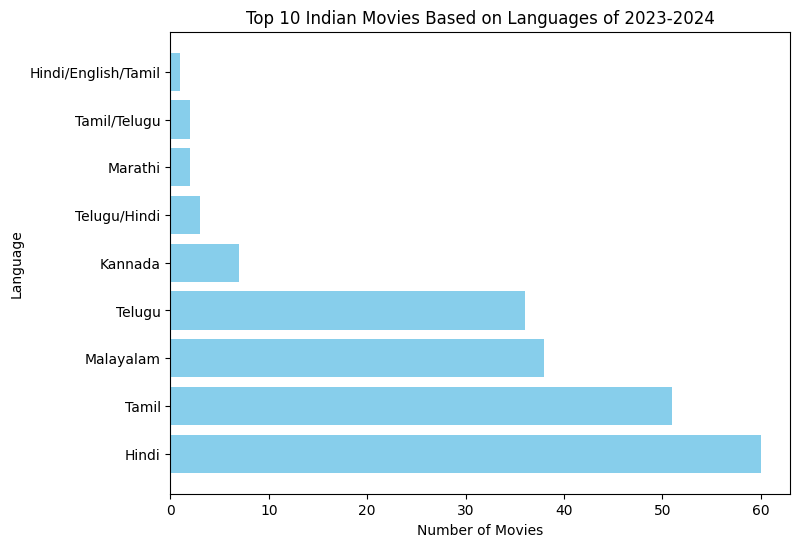

In [ ]:
# Assuming data['Language'] contains the language data
Language = data['Language'].value_counts().head(10)

# Create the bar plot using Matplotlib
plt.figure(figsize=(8, 6))
plt.barh(Language.index, Language.values, color='skyblue')

# Set the title and labels
plt.title('Top 10 Indian Movies Based on Languages of 2023-2024')
plt.xlabel('Number of Movies')
plt.ylabel('Language')

# Display the plot
plt.show()

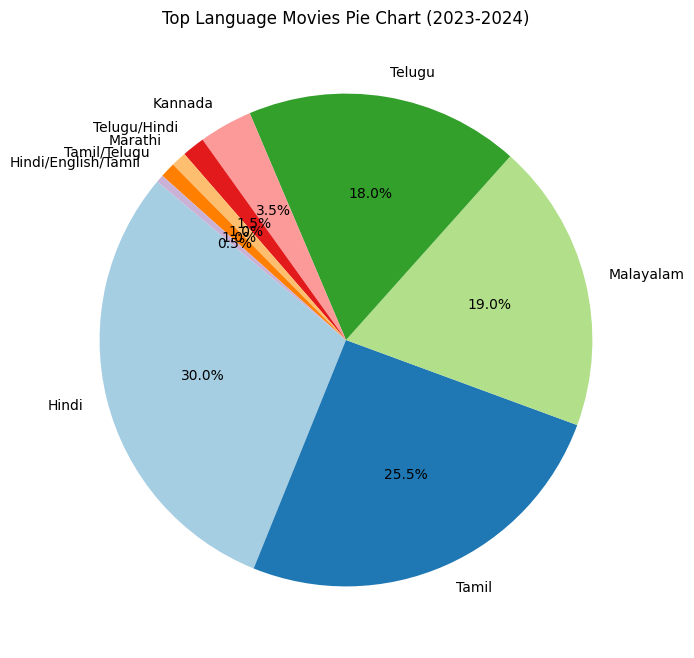

In [ ]:
# Create the pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(Language.values, labels=Language.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Set the title
plt.title("Top Language Movies Pie Chart (2023-2024)")

# Display the pie chart

plt.show()

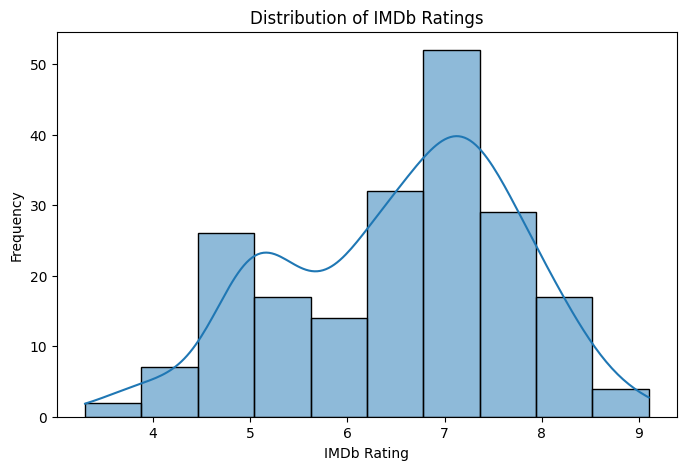

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for IMDb rating
plt.figure(figsize=(8, 5))
sns.histplot(data['IMDb rating'], bins=10, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()


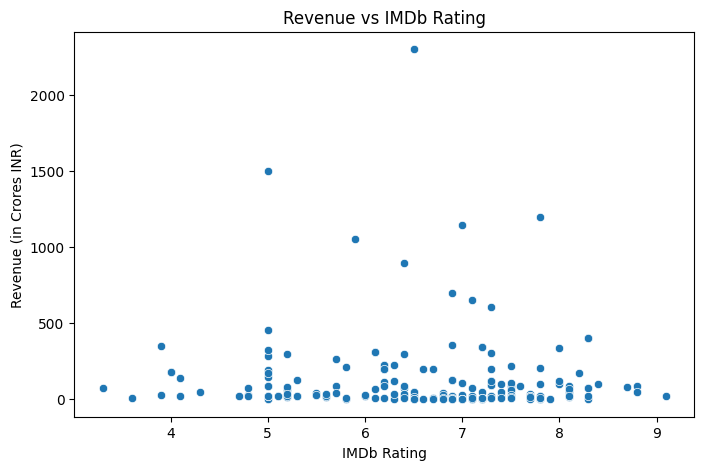

In [ ]:
# Scatter plot for Revenue and IMDb rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x='IMDb rating', y='Revenue (in Crores INR)', data=data)
plt.title('Revenue vs IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Revenue (in Crores INR)')
plt.show()


In [ ]:
# Standardize column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w]', '', regex=True)
print("Updated column names:", data.columns)


Updated column names: Index(['serial_number', 'title', 'year', 'age_certification', 'imdb_rating',
       'revenue_in_crores_inr', 'netflix', 'zee5', 'jio_cinema', 'prime_video',
       'disney_hotstar', 'director_name', 'genres', 'language',
       'runtime_minutes'],
      dtype='object')


In [ ]:
# Encoding binary categorical columns
binary_columns = ['netflix', 'zee5', 'jio_cinema', 'prime_video', 'disney_hotstar']
data[binary_columns] = data[binary_columns].replace({'Yes': 1, 'No': 0})

# Label encoding for categorical columns (e.g., language, genres)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['language_encoded'] = label_encoder.fit_transform(data['language'])
data['genres_encoded'] = label_encoder.fit_transform(data['genres'])


<ipython-input-23-bdccc1718a06>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[binary_columns] = data[binary_columns].replace({'Yes': 1, 'No': 0})


In [ ]:
data.head()

,serial_number,title,year,age_certification,imdb_rating,revenue_in_crores_inr,netflix,zee5,jio_cinema,prime_video,disney_hotstar,director_name,genres,language,runtime_minutes,language_encoded,genres_encoded
0,1,Pathaan,2023,UA,5.9,1050.30,1,0,0,1,0,Siddharth Anand,Action/Thriller,Hindi,146,0,15
1,2,Jawan,2023,UA,7.0,1148.32,1,0,0,0,0,Atlee,Action/Thriller,Hindi,169,0,15
2,3,Animal,2023,A,6.4,896.63,0,0,0,1,0,Sandeep Reddy Vanga,Action/Crime/Drama,Hindi,201,0,10
3,4,Rocky Aur Rani Kii Prem Kahaani,2023,UA,6.9,355.61,1,0,0,0,0,Karan Johar,Romance/Drama,Hindi,168,0,60
4,5,OMG 2,2023,A,7.5,221.75,0,0,0,1,0,Amit Rai,Comedy/Drama,Hindi,156,0,27


In [ ]:
# Define a function to assign revenue tiers
def assign_revenue_tier(revenue):
    if revenue <= 100:
        return 'Low'
    elif revenue <= 500:
        return 'Medium'
    elif revenue <= 1000:
        return 'High'
    else:
        return 'Blockbuster'

# Apply the function to create the revenue_tier column
data['revenue_tier'] = data['revenue_in_crores_inr'].apply(assign_revenue_tier)



In [ ]:
data.head()

,serial_number,title,year,age_certification,imdb_rating,revenue_in_crores_inr,netflix,zee5,jio_cinema,prime_video,disney_hotstar,director_name,genres,language,runtime_minutes,language_encoded,genres_encoded,revenue_tier
0,1,Pathaan,2023,UA,5.9,1050.30,1,0,0,1,0,Siddharth Anand,Action/Thriller,Hindi,146,0,15,Blockbuster
1,2,Jawan,2023,UA,7.0,1148.32,1,0,0,0,0,Atlee,Action/Thriller,Hindi,169,0,15,Blockbuster
2,3,Animal,2023,A,6.4,896.63,0,0,0,1,0,Sandeep Reddy Vanga,Action/Crime/Drama,Hindi,201,0,10,High
3,4,Rocky Aur Rani Kii Prem Kahaani,2023,UA,6.9,355.61,1,0,0,0,0,Karan Johar,Romance/Drama,Hindi,168,0,60,Medium
4,5,OMG 2,2023,A,7.5,221.75,0,0,0,1,0,Amit Rai,Comedy/Drama,Hindi,156,0,27,Medium


In [ ]:
# Convert movie titles to lowercase and remove special characters
data['title_cleaned'] = data['title'].str.lower().str.replace(r'[^\w\s]', '', regex=True)


In [ ]:
# Drop irrelevant columns
columns_to_drop = ['serial_number', 'director_name', 'title', 'age_certification']
data_cleaned = data.drop(columns=columns_to_drop)


In [ ]:
# Find columns with string data
string_columns = data.select_dtypes(include=['object']).columns
print("Columns with string data:", string_columns)


Columns with string data: Index(['title', 'age_certification', 'director_name', 'genres', 'language',
       'revenue_tier', 'title_cleaned'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'string_columns' contains the columns with string data
label_encoder = LabelEncoder()

for column in string_columns:
    data[column] = label_encoder.fit_transform(data[column])

print("Data after Label Encoding:")
print(data)


Data after Label Encoding:
     serial_number  title  year  age_certification  imdb_rating  \
0                1    115  2023                  1          5.9   
1                2     64  2023                  1          7.0   
2                3     11  2023                  0          6.4   
3                4    131  2023                  1          6.9   
4                5    109  2023                  0          7.5   
..             ...    ...   ...                ...          ...   
195            196     67  2023                  1          7.8   
196            197     33  2023                  1          6.9   
197            198     49  2023                  1          7.5   
198            199     94  2023                  1          7.1   
199            200     95  2023                  1          7.0   

     revenue_in_crores_inr  netflix  zee5  jio_cinema  prime_video  \
0                  1050.30        1     0           0            1   
1                  1148.32  

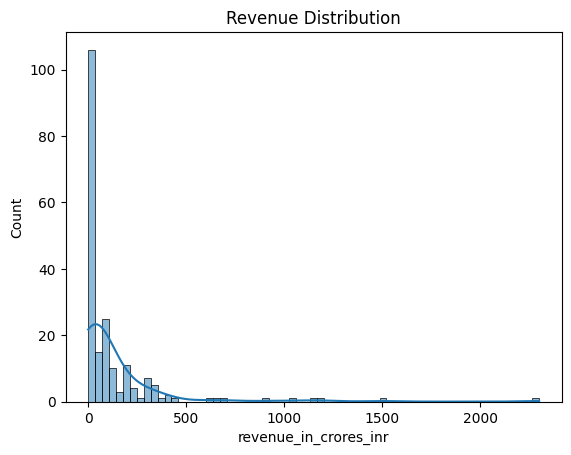

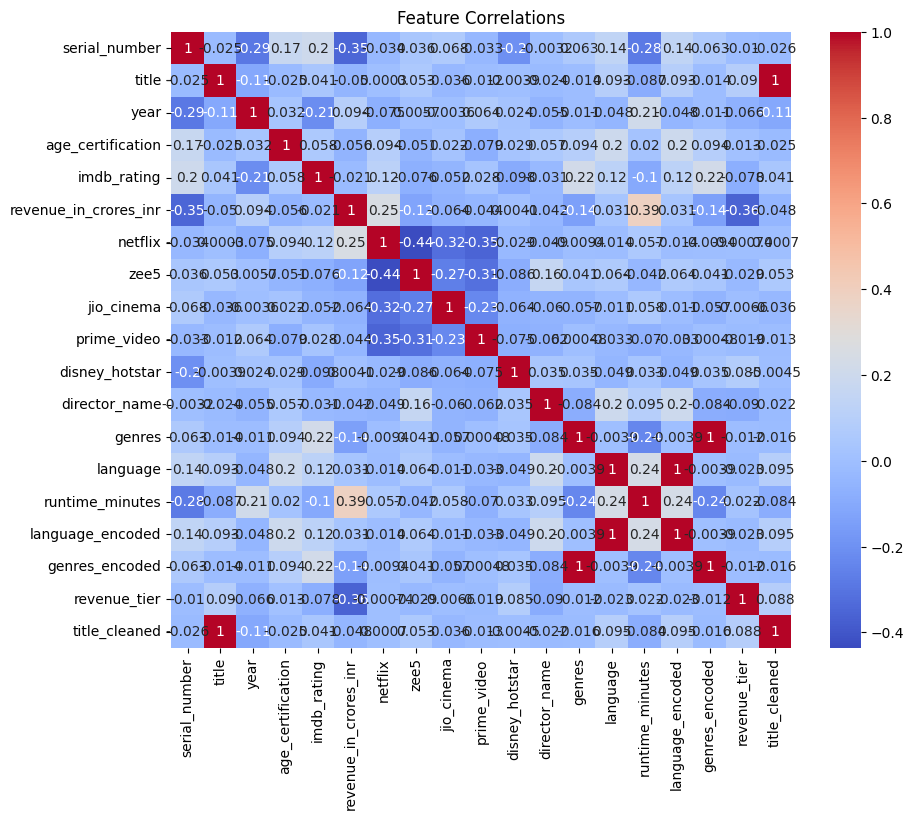

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of target variable
sns.histplot(data['revenue_in_crores_inr'], kde=True)
plt.title('Revenue Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Define features and target
X = data[['imdb_rating', 'runtime_minutes', 'language_encoded', 'genres_encoded']]
y = data['revenue_in_crores_inr']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical data
scaler = StandardScaler()
numerical_cols = ['imdb_rating', 'runtime_minutes']
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Combine scaled numerical data with categorical data
X_train_processed = np.hstack([X_train_scaled, X_train[['language_encoded', 'genres_encoded']].values])
X_test_processed = np.hstack([X_test_scaled, X_test[['language_encoded', 'genres_encoded']].values])

# Train the model (Random Forest in this case)
model = RandomForestRegressor()
model.fit(X_train_processed, y_train)

# Make predictions
y_pred = model.predict(X_test_processed)

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate percentage error
percentage_errors = np.abs((y_pred - y_test) / y_test) * 100

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")
print(f"Percentage Errors: {percentage_errors}")

# Check if the model's prediction is within the 10% margin of error
within_margin_of_error = (percentage_errors <= 10).mean() * 100
print(f"Percentage of predictions within 10% margin of error: {within_margin_of_error}%")


Mean Absolute Error (MAE): 131.060635
Mean Squared Error (MSE): 56528.71954804249
Root Mean Squared Error (RMSE): 237.7576908283778
R-squared: -12.735748839485682
Percentage Errors: 95        28.650000
15       707.361290
30      2584.781333
158       12.280882
128     2476.993000
115       24.871111
69         2.435542
170        7.650000
174      259.833333
45     14306.000000
66      1519.915385
182      114.416667
165      538.500000
78        29.084040
186      221.861250
177      838.000000
56       400.119565
152      139.598158
82         0.600000
68        52.553000
124       58.320000
16       645.588486
148      116.937857
93        69.210000
65      1225.166667
60        78.653040
84      1992.693333
67        47.613333
125      341.366600
132      418.172000
9         89.985727
18       104.831579
55       956.258261
75        71.547250
150      747.707857
104       89.716667
135      413.780000
137       90.793333
164      360.656667
76      1156.000000
Name: revenue_in_c

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate mean of actual values
mean_actual = np.mean(y_test)

# RMSE as a percentage
rmse_percentage = (rmse / mean_actual) * 100

print(f"RMSE Percentage: {rmse_percentage:.2f}%")


RMSE Percentage: 486.50%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Example data (replace with your own data)

# Step 1: Define the features (X) and target (y)
X = data[['imdb_rating', 'runtime_minutes', 'language_encoded', 'genres_encoded']]  # Features
y = data['revenue_in_crores_inr']  # Target (revenue)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Preprocess the data
# Define the scaler and encoder for scaling and encoding features
scaler = StandardScaler()  # Used to scale numerical data
encoder = OneHotEncoder(sparse_output=False)  # Use 'sparse_  # To encode categorical features

# Scale the numerical data
numerical_cols = ['imdb_rating', 'runtime_minutes']
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Since language and genres are already encoded, no need to use OneHotEncoder here
X_train_encoded = X_train[['language_encoded', 'genres_encoded']].values
X_test_encoded = X_test[['language_encoded', 'genres_encoded']].values

# Combine the scaled numerical and encoded categorical data
X_train_processed = np.hstack([X_train_scaled, X_train_encoded])
X_test_processed = np.hstack([X_test_scaled, X_test_encoded])

# Step 4: Train the model
model = RandomForestRegressor()
model.fit(X_train_processed, y_train)

# Step 5: Evaluate the model
train_score = model.score(X_train_processed, y_train)
test_score = model.score(X_test_processed, y_test)

print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")

# Step 6: Make predictions on new data
new_data = pd.DataFrame({
    'imdb_rating': [7.5],
    'runtime_minutes': [140],
    'language_encoded': [1],  # Example encoding for language
    'genres_encoded': [2]     # Example encoding for genres
})

# Preprocess the new data (scale and encode)
new_data_scaled = scaler.transform(new_data[numerical_cols])
new_data_encoded = new_data[['language_encoded', 'genres_encoded']].values

# Combine the processed new data
new_data_processed = np.hstack([new_data_scaled, new_data_encoded])

# Make the prediction
predicted_revenue = model.predict(new_data_processed)
print(f"Predicted Revenue: {predicted_revenue[0]} Crores")


Training Score: 0.8850616784082905
Test Score: -15.297635235280037
Predicted Revenue: 182.14669999999995 Crores


In [ ]:
from sklearn.metrics import mean_absolute_error

# Step 5a: Predict revenue on the test set
y_test_pred = model.predict(X_test_processed)

# Step 5b: Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_test_pred)

print(f"Mean Absolute Error (MAE): {mae} Crores")


Mean Absolute Error (MAE): 141.6982875 Crores
